# Universidad de Buenos Aires
# Examen Machine Learning
Como propuesta para el proyecto de ML2 se tomará el dataset utilizado en ML1 y el mejor modelo logrado en esa ocación (Randon Forest).\
El objetivo es comparar el accuracy obtenido con el Random Forest entrenado con los conocimientos de ML1, ahora comparando utilizando:
- GridSearch y RandomizedSearchCV (tuneo de hiperparámetros)
- AutoML (modelos logrados con plataformas cloud como Azure y GCP)

El dataset se compone de:

- age --> edad en años
- sex --> (1 = masculino; 0 = femenino)
- cp --> tipo de ataque al corazón
- trestbps --> presión arterial en reposo (mm Hg)
- chol --> colesterol (mg/dl)
- fbs --> fbs - glucemia en ayunas, fbsr > 120 mg/dl = 1(true), sino 0(false)
- restecg --> electrocardiográfico en reposo (1=true, 0=false)
- thalach --> máxima frecuencia cardíaca alcanzada
- exang --> ejercicio indujo angina (1=true, 0=false)
- oldpeak --> densenso del ST inducido por el ejercicio
- slope --> pico de la pendiente del ST durante el ejercicio
- ca --> número de vasos principales (0-3) coloreados por la floración
- thal --> transtorno talasemia (3=normal, 6=fixed defect, 7=reversable defect)
- target --> tiene enfermedad cardíaca (1=true, 0=false)



In [ ]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



## 1 - Recolectar los datos

In [ ]:
if os.access('heart.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/hernancontigiani/ceia_intro_ia/master/machine_learning_1/proyecto/heart.csv > heart.csv
    else:
        !wget geart.csv https://raw.githubusercontent.com/hernancontigiani/ceia_intro_ia/master/machine_learning_1/proyecto/heart.csv

--2020-12-21 01:16:41--  http://geart.csv/
Resolving geart.csv (geart.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘geart.csv’
--2020-12-21 01:16:41--  https://raw.githubusercontent.com/hernancontigiani/ceia_intro_ia/master/machine_learning_1/proyecto/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11024 (11K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  10.77K  --.-KB/s    in 0s      

2020-12-21 01:16:41 (129 MB/s) - ‘heart.csv’ saved [11024/11024]

FINISHED --2020-12-21 01:16:41--
Total wall clock time: 0.2s
Downloaded: 1 files, 11K in 0s (129 MB/s)


In [ ]:
df = pd.read_csv('heart.csv')

### 2 - Explorar datos

In [ ]:
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000
Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
%Nan,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


Se puede ver que no hay elementos faltantes (NaN) como tampoco hay variables categóricas texto.

In [ ]:
# Cantidad de filas a analizar
print('Cantidad de filas del dataset:', df.shape[0])

Cantidad de filas del dataset: 303


In [ ]:
# Analizar que tan balanceado esta el dataset respecto a taget
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

Se puede ver que el dataset está bastante balanceado, hay más casos con enfemedad cardíaca.

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 3 - Procesamiento de los datos
Hay datos que corresponden a multiclase, para mejorar su tratamiento por el modelo realizaremos OneHotEncoding para separar las clases en columnas. Clases para codigicar:
- cp
- slope
- thal

Otros tipos de datos entre las columnas:

- Hay otras columnas (como sex, restecg) que son clases binarias por lo que no es necesario una transformación
- Hay otras columnas (como age, ca) que representan una "cantidad" por lo que no es necesario codigicar pero sin normalizar.

In [ ]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [ ]:
cp = pd.get_dummies(df['cp'], prefix = "cp")
cp.head()

,cp_0,cp_1,cp_2,cp_3
0,0,0,0,1
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,1,0,0,0


Este mismo trabajo se realiza con el resto de las columnas multiclase

In [ ]:
slope = pd.get_dummies(df['slope'], prefix = "slope")
slope.head()

,slope_0,slope_1,slope_2
0,1,0,0
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [ ]:
thal = pd.get_dummies(df['thal'], prefix = "thal")
thal.head()

,thal_0,thal_1,thal_2,thal_3
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [ ]:
# Descartar las viejas coulmnas de estos datos:
df2 = df.drop(['cp', 'slope', 'thal'], axis=1)

In [ ]:
# Agregar las nuevas columnas codigicada como OneHoyEncoding
df2 = df2.join([cp, slope, thal])
df2

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,target,cp_0,cp_1,cp_2,cp_3,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,0,1,0,0,0,1,1,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,1,0,0,1,0,1,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,0,1,0,1,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,0,1,0,1,0,0,0,0,1,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,0,1,1,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,140,241,0,1,123,1,0.2,0,0,1,0,0,0,0,1,0,0,0,0,1
299,45,1,110,264,0,1,132,0,1.2,0,0,0,0,0,1,0,1,0,0,0,0,1
300,68,1,144,193,1,1,141,0,3.4,2,0,1,0,0,0,0,1,0,0,0,0,1
301,57,1,130,131,0,1,115,1,1.2,1,0,1,0,0,0,0,1,0,0,0,0,1


In [ ]:
# Separar los datos en entrada/feature (X) y salida/target (y)
y = df2['target'].values
X_data = df2.drop(['target'], axis=1)

In [ ]:
# Por último, normalizamos la data de entrada
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

X = min_max_scaler.fit_transform(X_data)
print(X)

[[0.70833333 1.         0.48113208 ... 1.         0.         0.        ]
 [0.16666667 1.         0.33962264 ... 0.         1.         0.        ]
 [0.25       0.         0.33962264 ... 0.         1.         0.        ]
 ...
 [0.8125     1.         0.47169811 ... 0.         0.         1.        ]
 [0.58333333 1.         0.33962264 ... 0.         0.         1.        ]
 [0.58333333 0.         0.33962264 ... 0.         1.         0.        ]]


## 4 - Preparar los datos de entrenamiento
- Ahora que ya tenemos todos los datos, podemos compararlos en una matriz de correlación para ver el aporte de cada feature a la salida.
- Luego separar los datos en datos de train y de test para probar contra "N" modelos.


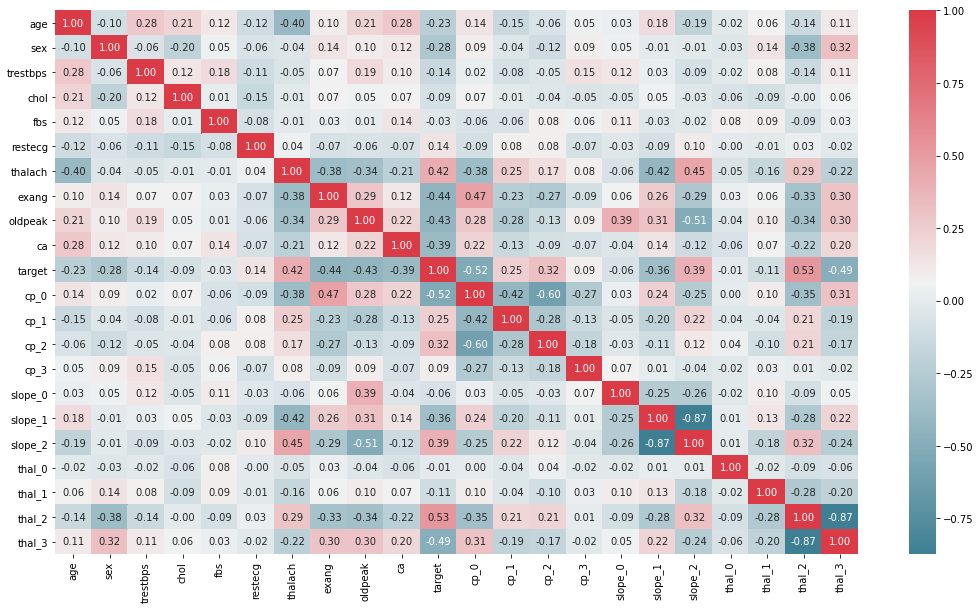

In [ ]:
corr = df2.corr()
fig, ax1 = plt.subplots(1, figsize=(18, 10))
sns.heatmap(corr, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, fmt=".2f")
sns.set(font_scale=1.5)

En general la mayoría de los features están muy relacionados con la salida, algunas clases como cp_0, cp_3, thal_0 están menos relacionadas (pero son parte de cp y thal)

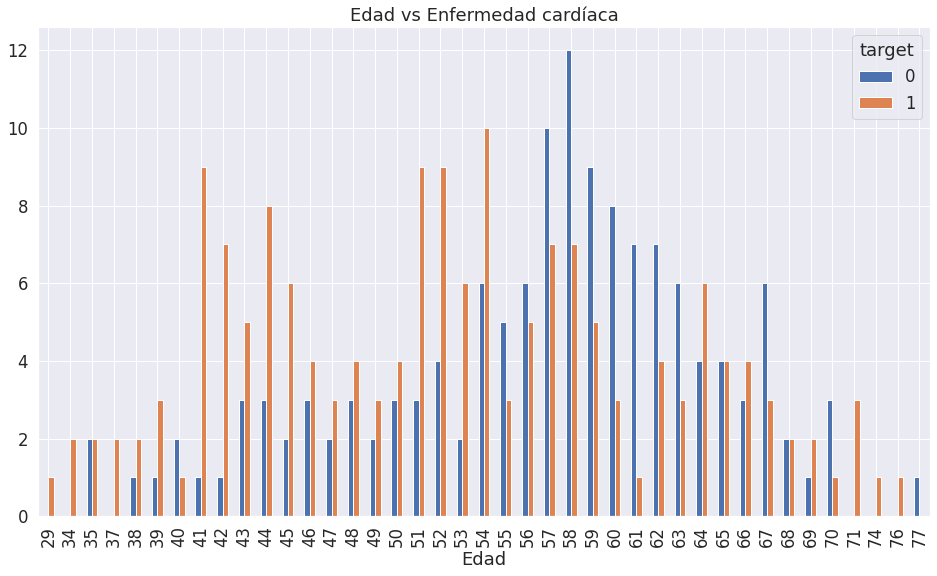

In [ ]:
ct = pd.crosstab(df2['age'], df2['target'])
ct.plot(kind="bar",figsize=(16,9))
plt.title('Edad vs Enfermedad cardíaca')
plt.xlabel('Edad')
plt.show()

Según el análsis del gráfico anterior pareciera ser que las edades entre 40 y 50 años tiene mayor probabilidad de tener enfermedades cardíacas. ¿Será eso cierto? Por qué ya vimos que no había una alta correlación entre las edades y la salida.
Analicemos la distribución de las edades "puestas en observación":

Promedio de las edades evaluadas: 54.366336633663366


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Edad')

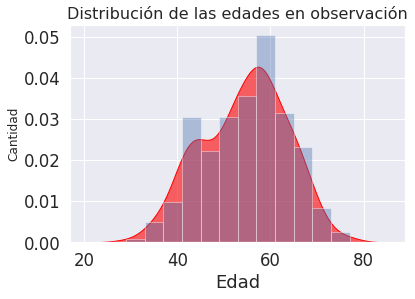

In [ ]:
print("Promedio de las edades evaluadas:", df2['age'].mean())

ax = sns.distplot(df2['age'], kde=True, kde_kws={"color": "red", "alpha":0.6, "linewidth": 1, "shade":True })
ax.set_title("Distribución de las edades en observación", fontsize=16)
ax.set_ylabel("Cantidad", fontsize=12)
ax.set_xlabel('Edad')

Se puede ver que la mayoría de las personas puestas en observación son entre 50 y 60 años, no es una distribución uniforme. Es por esto que puede llegar a existir el sesgo en las edades que se alejan del promedio o mediana de esta distribución (hay que tener en cuenta que esto podría sesgar al algoritmo).

Mismo análisis pero ahora del sexo

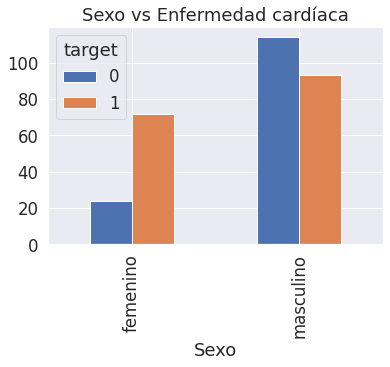

In [ ]:
ct = pd.crosstab(df2['sex'].replace({0: 'femenino', 1: 'masculino'}), df2['target'])
ct.plot(kind="bar")
plt.title('Sexo vs Enfermedad cardíaca')
plt.xlabel('Sexo')
plt.show()

Pareciera ser que el sexo femenino tiene mayor tendencia a los ataques cardíacos, pero ¿están balanceadas las muestras respecto al sexo?

In [ ]:
df2['sex'].replace({0: 'femenino', 1: 'masculino'}).value_counts()

masculino    207
femenino      96
Name: sex, dtype: int64

Claramente no! Otro valor que podría sesgar al modelo.

## 5 - Entrenar los modelos
- Entrenar diferentes modelos y encontrar el mejor performante contra el dataset de test. Para eso se utilizarán los siguientes algoritmos de clasificación:
 - Decision Tree
 - Random Forest
 - Logistic Regresion
 - KNN
 - SVM Classifier
 - AdaBoost Classifier
 - XGBoost Classifier

In [ ]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble  import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble  import AdaBoostClassifier
import xgboost as xgb

In [ ]:
# Separar los datos de entrenamiento (train) y de prueba (test) 20%
from sklearn.model_selection import train_test_split
indices = np.arange(X.shape[0])
X_train, X_test, y_train, y_test, index_train, index_test = train_test_split(X, y, indices, test_size=0.20, random_state=42)

In [ ]:
index_train[:10]

array([132, 202, 196,  75, 176,  59,  93,   6, 177,  30])

In [ ]:
df_train = df2.loc[index_train, :]
df_test =  df2.loc[index_test, :]

df_train.to_csv("df_train.csv", index = False)
df_test.to_csv("df_test.csv", index = False)

In [ ]:
# Separar los datos de entrenamiento y valid para hyperparameter tunning
X_train_tuning, X_valid_tuning, y_train_tuning, y_valid_tuning = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [ ]:
classifier = []
accuracy = []

In [ ]:
class ModelCompare():
    def __init__(self):
        self.name = ""
        self.model = None
        self.accuracy = 0
        self.f1_score = 0

    def it2hp(self, it):
        # itearation_to_hyperparameter
        raise NotImplemented

    def fit(self, X_train, y_train, hp):
        raise NotImplemented
    
    def compare(self, X_train, y_train, X_test, y_test, iteration=100):
        models = []

        mean_acc = np.zeros((iteration))
        std_acc = np.zeros((iteration))
        f1_scores = np.zeros((iteration))

        for it in range(iteration):
            # Train de model
            model = self.fit(X_train, y_train, self.it2hp(it+1))

            # Predict
            y_hat = model.predict(X_test)   

            # Evaluar el modelo
            mean_acc[it] = metrics.accuracy_score(y_test, y_hat)    
            std_acc[it] = np.std(y_hat==y_test)/np.sqrt(y_hat.shape[0])
            f1_scores[it] = metrics.f1_score(y_test, y_hat)
            models.append(model)

        plt.plot(range(1, iteration+1), mean_acc,'darkBlue')
        plt.fill_between(range(1, iteration+1), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
        plt.legend(('Accuracy ', '+/- std'))
        plt.ylabel('Accuracy ')
        plt.xlabel('hp')
        plt.tight_layout()
        plt.show()

        print(f"La mejor exactitud se obtuvo con {mean_acc.max():.2f} con hp={self.it2hp(mean_acc.argmax()+1)}")
        print(f"El mejor f1_score se obtuvo con {f1_scores.max():.2f} con hp={self.it2hp(mean_acc.argmax()+1)}")
        self.model = models[mean_acc.argmax()]
        self.accuracy = mean_acc.max()
        self.f1_score = f1_scores[mean_acc.argmax()]
      

class DecisionTreeCompare(ModelCompare):
    def __init__(self):
        super().__init__()
        self.name = "DecisionTreeClassifier"
    def it2hp(self, it):
        # itearation_to_hyperparameter
        return it

    def fit(self, X_train, y_train, hp):
        self.model = DecisionTreeClassifier(criterion="entropy", max_depth = hp)
        return self.model.fit(X_train,y_train)


class RandomForestCompare(ModelCompare):
    def __init__(self):
        super().__init__()
        self.name = "RandomForestClassifier"
    def it2hp(self, it):
        # itearation_to_hyperparameter
        return it

    def fit(self, X_train, y_train, hp):
        self.model = RandomForestClassifier(n_estimators=hp, random_state=1, class_weight = 'balanced')
        return self.model.fit(X_train,y_train)


class LogisticRegresionCompare(ModelCompare):
    def __init__(self):
        super().__init__()
        self.name = "LogisticRegression"
    def it2hp(self, it):
        # itearation_to_hyperparameter
        return it / 100

    def fit(self, X_train, y_train, hp):
        self.model = LogisticRegression(C=hp, solver='sag')
        return self.model.fit(X_train,y_train)


class KNNCompare(ModelCompare):
    def __init__(self):
        super().__init__()
        self.name = "KNeighborsClassifier"
    def it2hp(self, it):
        # itearation_to_hyperparameter
        return it

    def fit(self, X_train, y_train, hp):
        self.model = KNeighborsClassifier(n_neighbors = hp)
        return self.model.fit(X_train,y_train)


class SVCCompare(ModelCompare):
    def __init__(self):
        super().__init__()
        self.name = "SupportVectorMachine"
    def it2hp(self, it):
        # itearation_to_hyperparameter
        return it

    def fit(self, X_train, y_train, hp):
        self.model = SVC()
        return self.model.fit(X_train,y_train)

class AdaBoostCompare(ModelCompare):
    def __init__(self):
        super().__init__()
        self.name = "AdaBoostClassifier"
    def it2hp(self, it):
        # itearation_to_hyperparameter
        return it

    def fit(self, X_train, y_train, hp):
        self.model = AdaBoostClassifier(n_estimators=hp)
        return self.model.fit(X_train,y_train)

class XGBoostCompare(ModelCompare):
    def __init__(self):
        super().__init__()
        self.name = "XGBClassifier"
    def it2hp(self, it):
        # itearation_to_hyperparameter
        return it

    def fit(self, X_train, y_train, hp):
        self.model = xgb.XGBClassifier(objective="binary:logistic", n_estimators=hp, random_state=42)
        return self.model.fit(X_train, y_train)

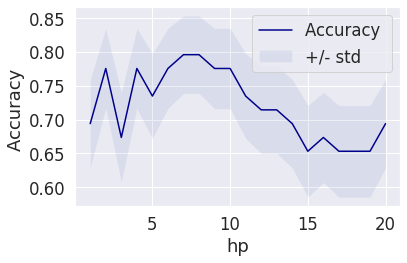

La mejor exactitud se obtuvo con 0.80 con hp=7
El mejor f1_score se obtuvo con 0.80 con hp=7


In [ ]:
model_compare = RandomForestCompare()
model_compare.compare(X_train_tuning, y_train_tuning, X_valid_tuning, y_valid_tuning, 20)
clf = model_compare.model

En la sección de conclusiones se compara este modelo con el resto

## 6 - Seleccionar de los hyperparámetros utilizando SearchCV

El objetivo es utiliza primero RandomizedSearchCV que lleva menos tiempo ejecutarlo. Con los parámetros obtenidos con RandomizedSearchCV se realizará una búsqueda más fina con GridSearchCV en torno a esos parámetros.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import time

parameters = {
    'criterion': ['entropy', 'gini'],
    'max_depth': list(range(5, 21, 3)) + [None],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'min_samples_leaf': list(range(2, 11, 2)),
    'min_samples_split': list(range(2, 11, 2)),
    'n_estimators': list(range(10, 20))
}

In [ ]:
start_time = time.time()
clf_random = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=parameters, n_iter=100, random_state=0, n_jobs=-1, scoring=['accuracy'], refit='accuracy')
clf_random.fit(X_train, y_train)
print("seconds: ", (time.time() - start_time))
clf_random.best_estimator_

seconds:  9.082846879959106


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=16,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
clf_random.best_score_

0.8389455782312926

Realizamos el análisis fino sobre el rango de parámetro que mejor resultado dio (un rango acotado) utilizando ahora GridSearchCV

In [ ]:
reduce_parameters = {
    'criterion': ['entropy'],
    'max_depth': list(range(5, 11, 2)) + [None],
    'max_features': ['sqrt'],
    'min_samples_leaf': list(range(7, 13)),
    'min_samples_split': list(range(6, 11)),
    'n_estimators': list(range(10, 20))
}

In [ ]:
start_time = time.time()
clf_grid = GridSearchCV(estimator=RandomForestClassifier(), param_grid=reduce_parameters, n_jobs=-1, scoring=['accuracy'], refit='accuracy')
clf_grid.fit(X_train, y_train)
print("seconds:", (time.time() - start_time))
clf_grid.best_estimator_

seconds: 93.87510561943054


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=9, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=18,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
clf_grid.best_score_

0.8554421768707483

En la sección de conclusiones se compara este modelo con el resto

## 7 - Entrenar el modelo en Google Cloud Platform AutoML

Video tutorial de como se entrenó el modelo en la plataforma GCP\
https://drive.google.com/file/d/1UEy0VV1_2-ZCnrEKaBcYN8cgrWaLG4F5/view?usp=sharing

In [ ]:
if os.access('google_predictions.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/hernancontigiani/ceia_intro_ia/master/machine_learning_1/proyecto/google_predictions.csv > google_predictions.csv
    else:
        !wget google_predictions.csv https://raw.githubusercontent.com/hernancontigiani/ceia_intro_ia/master/machine_learning_1/proyecto/google_predictions.csv

--2020-12-21 01:21:17--  http://google_predictions.csv/
Resolving google_predictions.csv (google_predictions.csv)... failed: Name or service not known.
wget: unable to resolve host address ‘google_predictions.csv’
--2020-12-21 01:21:17--  https://raw.githubusercontent.com/hernancontigiani/ceia_intro_ia/master/machine_learning_1/proyecto/google_predictions.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5648 (5.5K) [text/plain]
Saving to: ‘google_predictions.csv’

google_predictions. 100%[===================>]   5.52K  --.-KB/s    in 0s      

2020-12-21 01:21:18 (86.6 MB/s) - ‘google_predictions.csv’ saved [5648/5648]

FINISHED --2020-12-21 01:21:18--
Total wall clock time: 0.1s
Downloaded: 1 files, 5.5K in 0s (86.6 MB/s)


In [ ]:
# Predicciones descargadas del modelo entrenado en GCP
google_result = pd.read_csv('google_predictions.csv')

In [ ]:
google_result.head()

,age,ca,chol,cp_0,cp_1,cp_2,cp_3,exang,fbs,oldpeak,restecg,sex,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,thalach,trestbps,target_1_score,target_0_score
0,44,0,263,0,1,0,0,0,0,0.0,1,1,0,0,1,0,0,0,1,173,120,0.794597,0.205403
1,58,2,225,1,0,0,0,1,1,2.8,0,0,0,1,0,0,1,0,0,146,170,0.062175,0.937825
2,54,2,286,1,0,0,0,1,0,3.2,0,1,0,1,0,0,0,1,0,116,122,0.039363,0.960637
3,46,0,204,0,1,0,0,0,0,0.0,1,0,0,0,1,0,0,1,0,172,105,0.979908,0.020092
4,40,0,167,1,0,0,0,1,0,2.0,0,1,0,1,0,0,0,0,1,114,110,0.094548,0.905452


In [ ]:
# Unir con el dataset de test para obtener nuevamente la columna "test"
cols = ['age','ca','chol','cp_0','cp_1','cp_2','cp_3','exang','fbs','oldpeak','restecg','sex','slope_0','slope_1','slope_2','thal_0','thal_1','thal_2','thal_3','thalach','trestbps']
gcp_merged_inner = pd.merge(how='left',left=google_result, right=df_test, left_on=cols, right_on=cols)

In [ ]:
gcp_merged_inner.head()

,age,ca,chol,cp_0,cp_1,cp_2,cp_3,exang,fbs,oldpeak,restecg,sex,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3,thalach,trestbps,target_1_score,target_0_score,target
0,44,0,263,0,1,0,0,0,0,0.0,1,1,0,0,1,0,0,0,1,173,120,0.794597,0.205403,1
1,58,2,225,1,0,0,0,1,1,2.8,0,0,0,1,0,0,1,0,0,146,170,0.062175,0.937825,0
2,54,2,286,1,0,0,0,1,0,3.2,0,1,0,1,0,0,0,1,0,116,122,0.039363,0.960637,0
3,46,0,204,0,1,0,0,0,0,0.0,1,0,0,0,1,0,0,1,0,172,105,0.979908,0.020092,1
4,40,0,167,1,0,0,0,1,0,2.0,0,1,0,1,0,0,0,0,1,114,110,0.094548,0.905452,0


In [ ]:
# Obtene el valor real de referencia y la predicción para evaluar el accuracy
y_test_gcp = gcp_merged_inner['target'].values
gcp_results_prob = gcp_merged_inner[['target_0_score', 'target_1_score']].values
y_hat_gcp = np.argmax(gcp_results_prob, axis=1)

En la sección de conclusiones se compara este modelo con el resto

## 8 - Entrenar el modelo en Azure AutoML

Video tutorial de como se entrenó el modelo en la plataforma Azure\
Parte 1:\
https://drive.google.com/file/d/1UbtKOAq71Wzjh-pqSykr2dAIAcCrRMeT/view?usp=sharing \
Parte 2:\
https://drive.google.com/file/d/1YEzN8mQZMeVQnUUYXZyMV44KQvknS9Yu/view?usp=sharing

El modelo que mejor resultado obtuvo Azure fue con XGBoost con 0.847 de accuracy

<img src="https://github.com/hernancontigiani/ceia_intro_ia/raw/master/machine_learning_1/proyecto/azure_model.png" width="1000" align="center">

Métricas tomadas de la plataforma

<img src="https://github.com/hernancontigiani/ceia_intro_ia/raw/master/machine_learning_1/proyecto/azure_metrics.png" width="1000" align="center">

In [ ]:
azure_accuracy = 0.847

## 9 - Comparar los modelos generados

In [ ]:
# Métricas del tuneo de hyperparámetros a mano
y_hat = clf.predict(X_test)
print("Resultado de la selección básica de n_estimator:", metrics.accuracy_score(y_test, y_hat))

Resultado de la selección básica de n_estimator: 0.7868852459016393


In [ ]:
# Métricas del tuneo de hyperparámetros inteligente
y_hat = clf_grid.predict(X_test)
print("Resultado de la selección inteligente de los HP:", metrics.accuracy_score(y_test, y_hat))

Resultado de la selección inteligente de los HP: 0.8524590163934426


In [ ]:
# Métricas utilizando AutoML de GCP
print("Resultado utilizando AutoML de GCP:", metrics.accuracy_score(y_test_gcp, y_hat_gcp))

Resultado utilizando AutoML de GCP: 0.8852459016393442


In [ ]:
# Métricas utilizando AutoML de Azure
print("Resultado utilizando AutoML de Azure:", azure_accuracy)

Resultado utilizando AutoML de Azure: 0.847


## 10 - Conclusiones
En el desarrollo de este notebook se puede ver de la ventaja del tuneo de hiperparámetros. Se mejoró bastante el accuracy del modelo utilizando las técnicas de SearchCV que utilizamos en ML2.\
Por otro lado, otro salto de performance aparece al utilizar las herramientas cloud de AutoML, ya que estos servicios realizan un proceso exhaustivo de búsqueda (1 hora) del mejor modelo variando entre clasificadores y tuneo de hiperparámetros alcanzo un mejor resultado.\
De ahora en más utilizaré las técnicas vistas en la cursada para el tuneo de hiperparámetros.